New York City Taxi Trip Duration
--

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

File descriptions
train.csv - the training set (contains 1458644 trip records)
test.csv - the testing set (contains 625134 trip records)
sample_submission.csv - a sample submission file in the correct format

Data fields

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

EDA
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# home
#sample_submission=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
#test=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
#train=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

# SDacademy

sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

In [2]:
df_sample_submission=pd.DataFrame(sample_submission)
df_test=pd.DataFrame(test)
df_train=pd.DataFrame(train)

In [3]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [5]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [6]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [10]:
# df_train 시간별로 라벨 생성
df_train['time_pickup']=df_train['pickup_datetime'].dt.strftime('%m%d%H%M%S')
df_train['time_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m%d%H%M%S')

df_train['month_pickup']=df_train['pickup_datetime'].dt.strftime('%m')
df_train['month_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m')

df_train['date_pickup']=df_train['pickup_datetime'].dt.strftime('%d')
df_train['date_dropoff']=df_train['dropoff_datetime'].dt.strftime('%d')

df_train['hour_pickup']=df_train['pickup_datetime'].dt.strftime('%H')
df_train['hour_dropoff']=df_train['dropoff_datetime'].dt.strftime('%H')

df_train['day_pickup']=df_train['pickup_datetime'].dt.strftime('%A')
df_train['day_dropoff']=df_train['dropoff_datetime'].dt.strftime('%A')

df_train.reset_index(drop=True, inplace=True)

In [120]:
# df_test 시간별로 라벨 생성
df_test['time_pickup']=df_test['pickup_datetime'].dt.strftime('%m%d%H%M%S')

df_test['month_pickup']=df_test['pickup_datetime'].dt.strftime('%m')

df_test['date_pickup']=df_test['pickup_datetime'].dt.strftime('%d')

df_test['hour_pickup']=df_test['pickup_datetime'].dt.strftime('%H')

df_test['day_pickup']=df_test['pickup_datetime'].dt.strftime('%A')

df_test.reset_index(drop=True, inplace=True)

In [121]:
# 만든 날짜 및 시간별 데이터 정수로 변환
df_train['time_pickup']=pd.Series(df_train['time_pickup'], dtype=int)
df_train['time_dropoff']=pd.Series(df_train['time_dropoff'], dtype=int)

df_train['month_pickup']=pd.Series(df_train['month_pickup'], dtype=int)
df_train['month_dropoff']=pd.Series(df_train['month_dropoff'], dtype=int)

df_train['date_pickup']=pd.Series(df_train['date_pickup'], dtype=int)
df_train['date_dropoff']=pd.Series(df_train['date_dropoff'], dtype=int)

df_train['hour_pickup']=pd.Series(df_train['hour_pickup'], dtype=int)
df_train['hour_dropoff']=pd.Series(df_train['hour_dropoff'], dtype=int)

df_test['time_pickup']=pd.Series(df_test['time_pickup'], dtype=int)
df_test['month_pickup']=pd.Series(df_test['month_pickup'], dtype=int)
df_test['date_pickup']=pd.Series(df_test['date_pickup'], dtype=int)
df_test['hour_pickup']=pd.Series(df_test['hour_pickup'], dtype=int)

In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [ ]:
df_sample_submission.info()

In [ ]:
df_train.isna().sum()

In [ ]:
df_test.isna().sum()

In [ ]:
df_sample_submission.isna().sum()

날짜별, 시간대별 승객 수 보기(택시 기사 본인 제외)
--

1월부터 6월까지 달 별 탑승 승객 수 
- passenger_count >= 2 

In [12]:
solo=df_train[df_train.passenger_count==1].index
df_p=df_train.drop(solo)
df_p

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,0130220140,0130220903,01,01,30,30,22,22,Saturday,Saturday
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,...,0617223459,0617224040,06,06,17,17,22,22,Friday,Friday
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,...,0515111611,0515113459,05,05,15,15,11,11,Sunday,Sunday
12,id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.962982,40.756680,-73.984406,40.760719,N,...,0219095246,0219101120,02,02,19,19,09,10,Friday,Friday
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,...,0510192738,0510194440,05,05,10,10,19,19,Tuesday,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,...,0306110448,0306111745,03,03,06,06,11,11,Sunday,Sunday
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,N,...,0317191016,0317192635,03,03,17,17,19,19,Thursday,Thursday
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,...,0403135125,0403140737,04,04,03,03,13,14,Sunday,Sunday
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,...,0202003939,0202004633,02,02,02,02,00,00,Tuesday,Tuesday


In [13]:
df_p.groupby('month_pickup')['passenger_count'].sum().reset_index()

,month_pickup,passenger_count
0,01,221990
1,02,226055
2,03,243715
3,04,242059
4,05,237695
5,06,222902


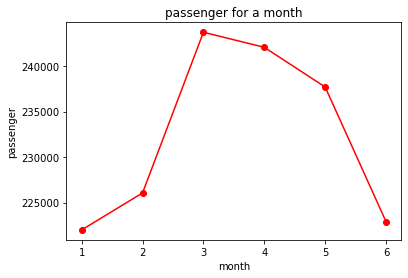

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_p['month_pickup'].unique()
month_passenger=df_p.groupby('month_pickup')['passenger_count'].sum()
month_passenger

labels=['1','2','3','4','5','6']

fig, ax=plt.subplots()
plt.plot(labels, month_passenger, marker="o", color='r')
plt.xlabel("month")
plt.ylabel("passenger")
plt.title("passenger for a month")
plt.show()

1일 부터 31일까지 일 별 탑승 승객 수

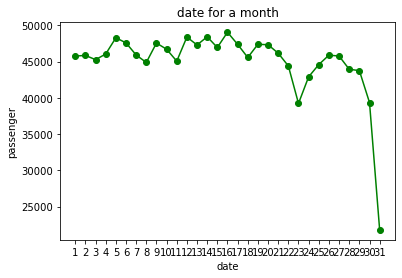

In [15]:
df_p['date_pickup'].unique()
date_passenger=df_p.groupby('date_pickup')['passenger_count'].sum()
date_passenger

labels=['1','2','3','4','5','6','7','8','9','10','11','12','13',
'14','15','16','17','18','19','20','21','22','23','24','25','26',
'27','28','29','30','31']

fig, ax=plt.subplots()
plt.plot(labels, date_passenger, marker="o", color='g')
plt.xlabel("date")
plt.ylabel("passenger")
plt.title("date for a month")
plt.show()

시간대별, 요일 별 승객 수 보기

[Text(0, 0.5, 'passenger'), Text(0.5, 1.0, 'day')]

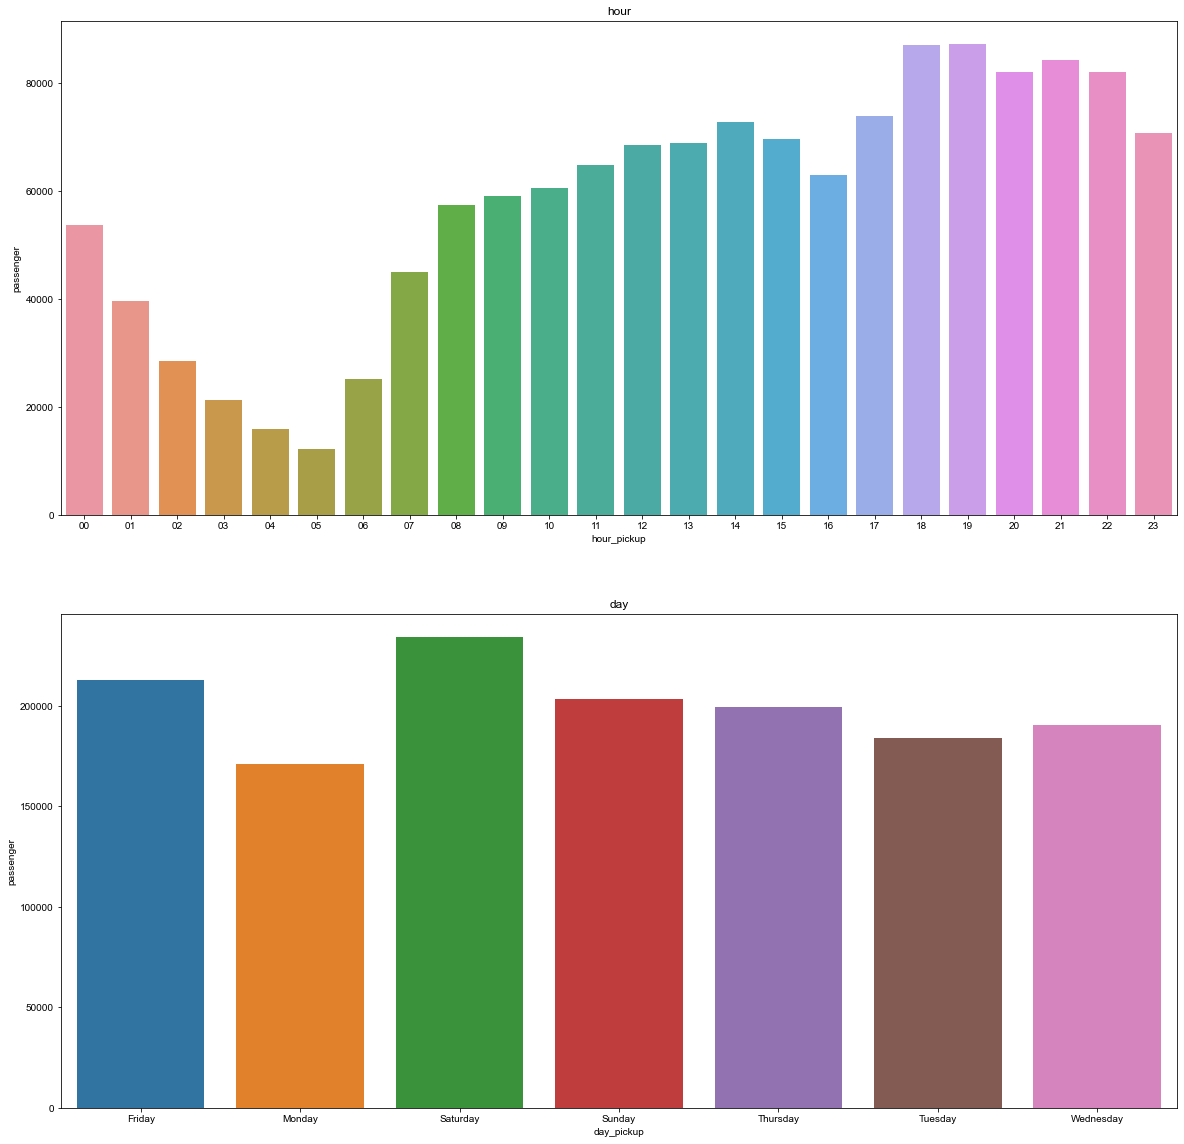

In [16]:
import seaborn as sns
hour_passenger=df_p.groupby('hour_pickup')['passenger_count'].sum().reset_index()
day_passenger=df_p.groupby('day_pickup')['passenger_count'].sum().reset_index()

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

sns.barplot(data=hour_passenger, x="hour_pickup", y="passenger_count", ax=ax1)
'\n'
sns.barplot(data=day_passenger, x="day_pickup", y="passenger_count", ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='passenger', title ="hour")
ax2.set(ylabel='passenger', title ="day")

- make elapsed_time column

In [19]:
i=0
elapsed_time=[]

for i in range(0,1458644):
    e_time=df_train.dropoff_datetime[i]-df_train.pickup_datetime[i]
    elapsed_time.append(e_time)
    i+=1

In [20]:
elapsed_time=pd.Series(elapsed_time)
df_train['elapsed_time']=elapsed_time
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0314173230,03,03,14,14,17,17,Monday,Monday,0 days 00:07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0612005438,06,06,12,12,00,00,Sunday,Sunday,0 days 00:11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0119121048,01,01,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0406193940,04,04,06,06,19,19,Wednesday,Wednesday,0 days 00:07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0326133810,03,03,26,26,13,13,Saturday,Saturday,0 days 00:07:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,0408134402,04,04,08,08,13,13,Friday,Friday,0 days 00:12:58
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,0110074610,01,01,10,10,07,07,Sunday,Sunday,0 days 00:10:55
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,0422071025,04,04,22,22,06,07,Friday,Friday,0 days 00:12:44
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,0105160239,01,01,05,05,15,16,Tuesday,Tuesday,0 days 00:06:13


- make elapsed_time_h column
- elpased_time_h == trip_duration * 3600

In [21]:
i=0
elapsed_time_h=[]

for i in range(0,1458644):
    e_time_h=round((df_train.elapsed_time.iloc[i].seconds/3600), 5)
    elapsed_time_h.append(e_time_h)

In [22]:
elapsed_time_h=pd.Series(elapsed_time_h)
df_train['elapsed_time_h']=elapsed_time_h

- make distance column

In [23]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def get_harvevrsion_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon=GeoUtil.degree2radius(x2-x1)
        dLat=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat/2)*math.sin(dLat/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon/2)*math.sin(dLon/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R*b, round_decimal_digits)

In [24]:
df_train['distance']=df_train.id
df_test['distance']=df_test.id

In [25]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [26]:
d=pd.Series(d)
df_train['distance']=d

In [27]:
i=0
d=[]

for i in range(0,625134):
    x1=df_test.iloc[i, 4]
    y1=df_test.iloc[i, 5]
    x2=df_test.iloc[i, 6]
    y2=df_test.iloc[i, 7]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [28]:
d=pd.Series(d)
df_test['distance']=d

- store_and_fwd_flag encoding

In [29]:
i=0
store_and_fwd_flag=[]

for i in range(0,1458644):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1  

In [30]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_train['store_and_fwd_flag']=store_and_fwd_flag

In [31]:
i=0
store_and_fwd_flag=[]

for i in range(0,625134):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1  

In [32]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_test['store_and_fwd_flag']=store_and_fwd_flag

store_and_fwd_flag ratio
--

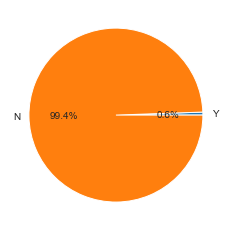

In [33]:
Y=len(df_train[df_train.store_and_fwd_flag==1].value_counts())
N=len(df_train[df_train.store_and_fwd_flag==0].value_counts())
store_and_fwd_flag=len(df_train.store_and_fwd_flag)

store_and_fwd_flag_ratio=[Y, N]
labels=['Y','N']

plt.pie(store_and_fwd_flag_ratio, labels=labels, autopct='%.1f%%')
plt.show()

- This flag indicates whether the trip record was held in vehicle memory before 

- sending to the vendor because the vehicle did not have a connection to the server

- Y=store and forward; N=not a store and forward trip


- store and forward 방식: 패킷교환에서 채택한 축적 교환(Store-and-Forward) 방식은 일단 들어오는 데이터를 버퍼에 담아두고(Store) CRC 등 에러검출과 같은 처리를 완전히 한 이후에 전달(Forward)하는 교환 기법이다.


vendor_id
--

- a code indicating the provider associated with the trip record

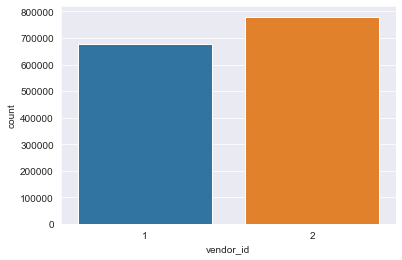

In [34]:
sns.countplot(df_train.vendor_id)
plt.show()

passenger_count
--

- passenger_count - the number of passengers in the vehicle (driver entered value)

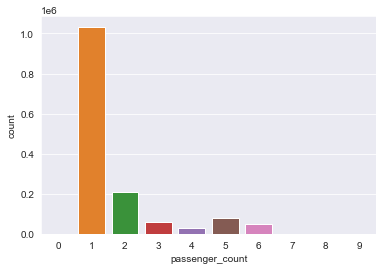

In [35]:
sns.countplot(df_train.passenger_count)
plt.show()

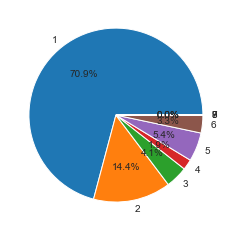

In [36]:
p1=len(df_train[df_train.passenger_count==1].value_counts())
p2=len(df_train[df_train.passenger_count==2].value_counts())
p3=len(df_train[df_train.passenger_count==3].value_counts())
p4=len(df_train[df_train.passenger_count==4].value_counts())
p5=len(df_train[df_train.passenger_count==5].value_counts())
p6=len(df_train[df_train.passenger_count==6].value_counts())
p7=len(df_train[df_train.passenger_count==7].value_counts())
p8=len(df_train[df_train.passenger_count==8].value_counts())
p9=len(df_train[df_train.passenger_count==9].value_counts())

pc=len(df_train.passenger_count)

passenger_count_ratio=[p1, p2, p3, p4, p5, p6, p7, p8, p9]
labels=['1','2','3','4','5','6','7','8','9']

plt.pie(passenger_count_ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [37]:
def bar_chart2(feature):
    no_passenger = df_train[df_train['passenger_count'] ==1][feature].value_counts() 
    passenger= df_train[df_train['passenger_count'] !=1][feature].value_counts() 
    df = pd.DataFrame([no_passenger,passenger]) 
    df.index = ['NO','YES'] 
    df.plot(kind = 'bar',stacked = True, figsize = (10,5)) 

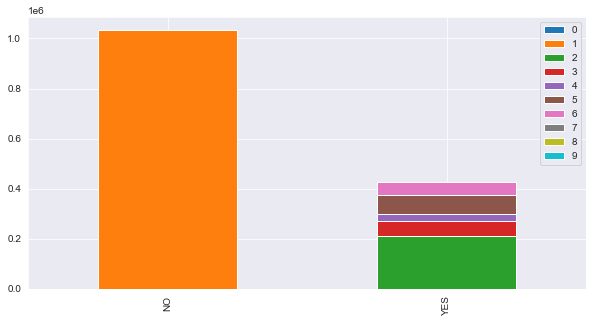

In [38]:
bar_chart2('passenger_count')

위도와 경도 분석하기
--

1.  train

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

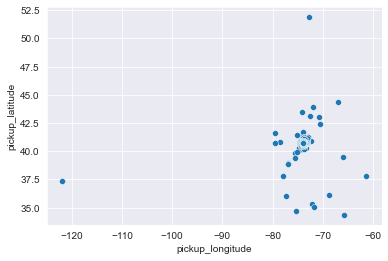

In [39]:
pickup=df_train.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

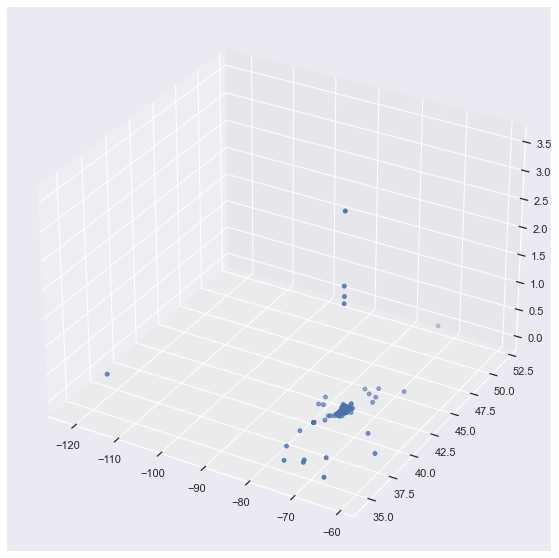

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

p_longitude=np.array(df_train.pickup_longitude)
p_latitude=np.array(df_train.pickup_latitude)
time=np.array(df_train.trip_duration)

xs=p_longitude
ys=p_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

- x: pickup_longitude
- y: pickup_latitude
- z: trip_duration

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

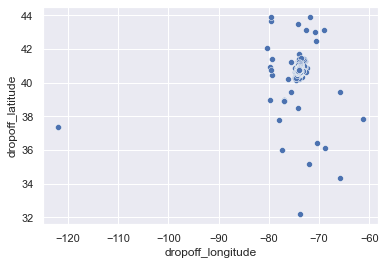

In [41]:
dropoff=df_train.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

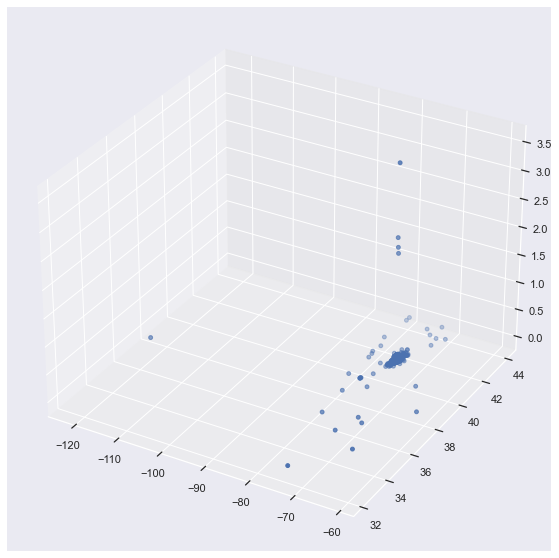

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

d_longitude=np.array(df_train.dropoff_longitude)
d_latitude=np.array(df_train.dropoff_latitude)
time=np.array(df_train.trip_duration)

xs=d_longitude
ys=d_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

2. test

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

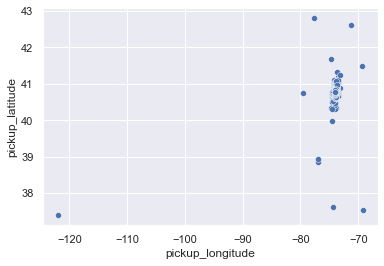

In [44]:
pickup=df_test.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

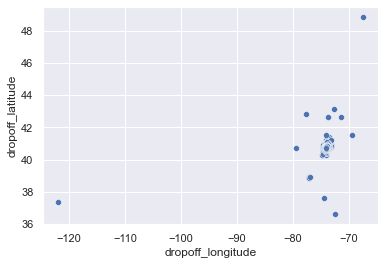

In [45]:
dropoff=df_test.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

Folium으로 지도 보기

1. train

In [60]:
pickup=df_train[['pickup_latitude','pickup_longitude']]
dropoff=df_train[['dropoff_latitude','dropoff_longitude']]

In [61]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [62]:
df_train.pickup_latitude.mean()

40.750920908391734

In [63]:
df_train.pickup_longitude.mean()

-73.97348630489282

In [64]:
len(pickup_list)

1458644

In [65]:
import folium

lon, lat= -73.97348630489282, 40.750920908391734
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(1458644, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

2. test

In [66]:
pickup=df_test[['pickup_latitude','pickup_longitude']]
dropoff=df_test[['dropoff_latitude','dropoff_longitude']]

In [67]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [68]:
df_test.pickup_latitude.mean()

40.75092741194779

In [69]:
df_test.pickup_longitude.mean()

-73.97361432244571

In [70]:
len(pickup_list)

625134

In [71]:
import folium

lon, lat= -73.97361432244571, 40.75092741194779
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(625134, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

K-means를 이용하여 군집화하기

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters

df_train['pickup_clusters']=pickup_clusters

In [75]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters

df_train['dropoff_clusters']=dropoff_clusters

In [76]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_test[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(df_test[['pickup_longitude','pickup_latitude']])
pickup_clusters

df_test['pickup_clusters']=pickup_clusters

In [77]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_test[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(df_test[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters

df_test['dropoff_clusters']=dropoff_clusters

1. train
- pick up

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

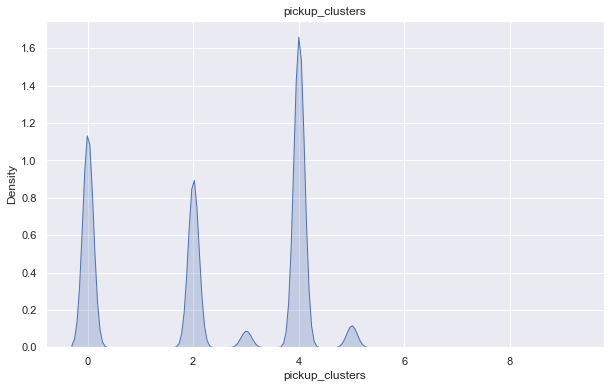

In [78]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=df_train['pickup_clusters'], shade=True)

- dropoff

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

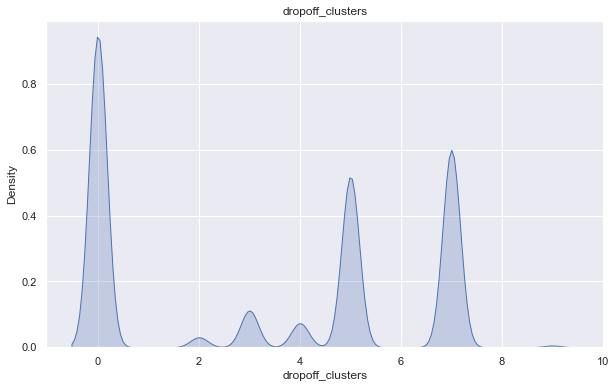

In [79]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=df_trtn_pickup_dropoff=df_train.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(tn_pickup_dropoff['pickup_clusters'], tn_pickup_dropoff['dropoff_clusters'])ain['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

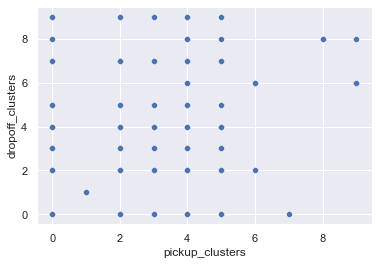

In [80]:
tn_pickup_dropoff=df_train.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(tn_pickup_dropoff['pickup_clusters'], tn_pickup_dropoff['dropoff_clusters'])

2. test
-  pickup

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

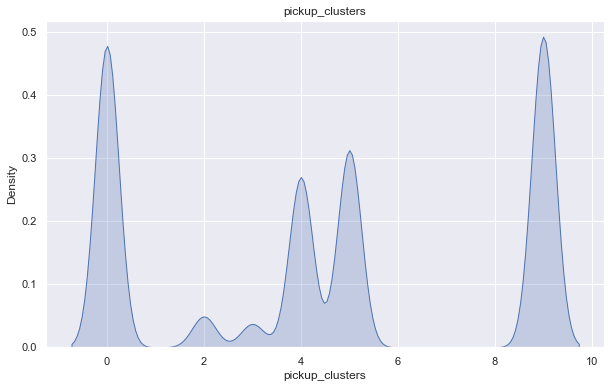

In [81]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=df_test['pickup_clusters'], shade=True)

- dropoff

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

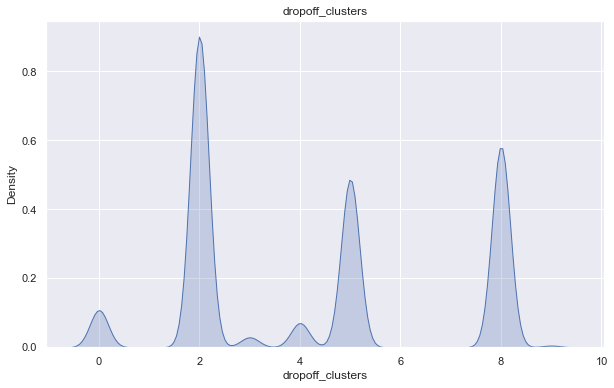

In [82]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=df_test['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

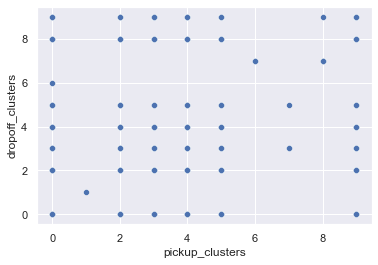

In [83]:
te_pickup_dropoff=df_test.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(te_pickup_dropoff['pickup_clusters'], te_pickup_dropoff['dropoff_clusters'])

각 군집별로 pickup, dropoff 구역별로 1과 0으로 설정하기

In [84]:
tn_pickup_clusters=np.array(df_train.pickup_clusters)
tn_dropoff_clusters=np.array(df_train.dropoff_clusters)
te_pickup_clusters=np.array(df_test.pickup_clusters)
te_dropoff_clusters=np.array(df_test.dropoff_clusters)

In [85]:
i=0
pc_0=[]
pc_1=[]
pc_2=[]
pc_3=[]
pc_4=[]
pc_5=[]
pc_6=[]
pc_7=[]
pc_8=[]
pc_9=[]

for i in range(0,1458644):
    if tn_pickup_clusters[i]==0:
        pc_0.append(1)
    else:
        pc_0.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==1:
        pc_1.append(1)
    else:
        pc_1.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==2:
        pc_2.append(1)
    else:
        pc_2.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==3:
        pc_3.append(1)
    else:
        pc_3.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==4:
        pc_4.append(1)
    else:
        pc_4.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==5:
        pc_5.append(1)
    else:
        pc_5.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==6:
        pc_6.append(1)
    else:
        pc_6.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==7:
        pc_7.append(1)
    else:
        pc_7.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==8:
        pc_8.append(1)
    else:
        pc_8.append(0)
        i+=1

        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==9:
        pc_9.append(1)
    else:
        pc_9.append(0)
        i+=1
        
    
pc_0=pd.Series(pc_0)
df_train['pc_0']=pc_0

pc_1=pd.Series(pc_1)
df_train['pc_1']=pc_1

pc_2=pd.Series(pc_2)
df_train['pc_2']=pc_2

pc_3=pd.Series(pc_3)
df_train['pc_3']=pc_3

pc_4=pd.Series(pc_4)
df_train['pc_4']=pc_4

pc_5=pd.Series(pc_5)
df_train['pc_5']=pc_5

pc_6=pd.Series(pc_6)
df_train['pc_6']=pc_6

pc_7=pd.Series(pc_7)
df_train['pc_7']=pc_7

pc_8=pd.Series(pc_8)
df_train['pc_8']=pc_8

pc_9=pd.Series(pc_9)
df_train['pc_9']=pc_9

In [86]:
i=0
dc_0=[]
dc_1=[]
dc_2=[]
dc_3=[]
dc_4=[]
dc_5=[]
dc_6=[]
dc_7=[]
dc_8=[]
dc_9=[]

for i in range(0,1458644):
    if tn_dropoff_clusters[i]==0:
        dc_0.append(1)
    else:
        dc_0.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==1:
        dc_1.append(1)
    else:
        dc_1.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==2:
        dc_2.append(1)
    else:
        dc_2.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==3:
        dc_3.append(1)
    else:
        dc_3.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==4:
        dc_4.append(1)
    else:
        dc_4.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==5:
        dc_5.append(1)
    else:
        dc_5.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==6:
        dc_6.append(1)
    else:
        dc_6.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==7:
        dc_7.append(1)
    else:
        dc_7.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==8:
        dc_8.append(1)
    else:
        dc_8.append(0)
        i+=1

        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==9:
        dc_9.append(1)
    else:
        dc_9.append(0)
        i+=1
        
        
        
dc_0=pd.Series(dc_0)
df_train['dc_0']=dc_0

dc_1=pd.Series(dc_1)
df_train['dc_1']=dc_1

dc_2=pd.Series(dc_2)
df_train['dc_2']=dc_2

dc_3=pd.Series(dc_3)
df_train['dc_3']=dc_3

dc_4=pd.Series(dc_4)
df_train['dc_4']=dc_4

dc_5=pd.Series(dc_5)
df_train['dc_5']=dc_5

dc_6=pd.Series(dc_6)
df_train['dc_6']=dc_6

dc_7=pd.Series(dc_7)
df_train['dc_7']=dc_7

dc_8=pd.Series(dc_8)
df_train['dc_8']=dc_8

dc_9=pd.Series(dc_9)
df_train['dc_9']=dc_9
       

In [87]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_pickup           0
time_dropoff          0
month_pickup          0
month_dropoff         0
date_pickup           0
date_dropoff          0
hour_pickup           0
hour_dropoff          0
day_pickup            0
day_dropoff           0
elapsed_time          0
elapsed_time_h        0
distance              0
pickup_clusters       0
dropoff_clusters      0
pc_0                  0
pc_1                  0
pc_2                  0
pc_3                  0
pc_4                  0
pc_5                  0
pc_6                  0
pc_7                  0
pc_8                  0
pc_9                  0
dc_0                  0
dc_1                  0
dc_2                  0
dc_3                  0
dc_4                  0
dc_5            

In [88]:
i=0
pc_0=[]
pc_1=[]
pc_2=[]
pc_3=[]
pc_4=[]
pc_5=[]
pc_6=[]
pc_7=[]
pc_8=[]
pc_9=[]

for i in range(0,625134):
    if te_pickup_clusters[i]==0:
        pc_0.append(1)
    else:
        pc_0.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==1:
        pc_1.append(1)
    else:
        pc_1.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==2:
        pc_2.append(1)
    else:
        pc_2.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==3:
        pc_3.append(1)
    else:
        pc_3.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==4:
        pc_4.append(1)
    else:
        pc_4.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==5:
        pc_5.append(1)
    else:
        pc_5.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==6:
        pc_6.append(1)
    else:
        pc_6.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==7:
        pc_7.append(1)
    else:
        pc_7.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==8:
        pc_8.append(1)
    else:
        pc_8.append(0)
        i+=1

        
for i in range(0,625134):
    if te_pickup_clusters[i]==9:
        pc_9.append(1)
    else:
        pc_9.append(0)
        i+=1
        
    
pc_0=pd.Series(pc_0)
df_test['pc_0']=pc_0

pc_1=pd.Series(pc_1)
df_test['pc_1']=pc_1

pc_2=pd.Series(pc_2)
df_test['pc_2']=pc_2

pc_3=pd.Series(pc_3)
df_test['pc_3']=pc_3

pc_4=pd.Series(pc_4)
df_test['pc_4']=pc_4

pc_5=pd.Series(pc_5)
df_test['pc_5']=pc_5

pc_6=pd.Series(pc_6)
df_test['pc_6']=pc_6

pc_7=pd.Series(pc_7)
df_test['pc_7']=pc_7

pc_8=pd.Series(pc_8)
df_test['pc_8']=pc_8

pc_9=pd.Series(pc_9)
df_test['pc_9']=pc_9

In [89]:
i=0
dc_0=[]
dc_1=[]
dc_2=[]
dc_3=[]
dc_4=[]
dc_5=[]
dc_6=[]
dc_7=[]
dc_8=[]
dc_9=[]

for i in range(0,625134):
    if te_dropoff_clusters[i]==0:
        dc_0.append(1)
    else:
        dc_0.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==1:
        dc_1.append(1)
    else:
        dc_1.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==2:
        dc_2.append(1)
    else:
        dc_2.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==3:
        dc_3.append(1)
    else:
        dc_3.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==4:
        dc_4.append(1)
    else:
        dc_4.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==5:
        dc_5.append(1)
    else:
        dc_5.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==6:
        dc_6.append(1)
    else:
        dc_6.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==7:
        dc_7.append(1)
    else:
        dc_7.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==8:
        dc_8.append(1)
    else:
        dc_8.append(0)
        i+=1

        
for i in range(0,625134):
    if te_dropoff_clusters[i]==9:
        dc_9.append(1)
    else:
        dc_9.append(0)
        i+=1
        
        
        
dc_0=pd.Series(dc_0)
df_test['dc_0']=dc_0

dc_1=pd.Series(dc_1)
df_test['dc_1']=dc_1

dc_2=pd.Series(dc_2)
df_test['dc_2']=dc_2

dc_3=pd.Series(dc_3)
df_test['dc_3']=dc_3

dc_4=pd.Series(dc_4)
df_test['dc_4']=dc_4

dc_5=pd.Series(dc_5)
df_test['dc_5']=dc_5

dc_6=pd.Series(dc_6)
df_test['dc_6']=dc_6

dc_7=pd.Series(dc_7)
df_test['dc_7']=dc_7

dc_8=pd.Series(dc_8)
df_test['dc_8']=dc_8

dc_9=pd.Series(dc_9)
df_test['dc_9']=dc_9
     

In [90]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
distance              0
pickup_clusters       0
dropoff_clusters      0
pc_0                  0
pc_1                  0
pc_2                  0
pc_3                  0
pc_4                  0
pc_5                  0
pc_6                  0
pc_7                  0
pc_8                  0
pc_9                  0
dc_0                  0
dc_1                  0
dc_2                  0
dc_3                  0
dc_4                  0
dc_5                  0
dc_6                  0
dc_7                  0
dc_8                  0
dc_9                  0
dtype: int64

In [91]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,1,0,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,0,0,0,0,0,0,1,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,0,0,0,0,0,0,0,1,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,0,0,0,0,0,0,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,0,0,0,0,0,1,0,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,1,0,0,0,0,0,0,0,0,0


In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  object         
 1   vendor_id           1458644 non-null  int64          
 2   pickup_datetime     1458644 non-null  datetime64[ns] 
 3   dropoff_datetime    1458644 non-null  datetime64[ns] 
 4   passenger_count     1458644 non-null  int64          
 5   pickup_longitude    1458644 non-null  float64        
 6   pickup_latitude     1458644 non-null  float64        
 7   dropoff_longitude   1458644 non-null  float64        
 8   dropoff_latitude    1458644 non-null  float64        
 9   store_and_fwd_flag  1458644 non-null  int64          
 10  trip_duration       1458644 non-null  int64          
 11  time_pickup         1458644 non-null  object         
 12  time_dropoff        1458644 non-null  object         
 1

In [92]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,2.74643,...,0,0,1,0,0,0,0,0,0,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,2.75924,...,1,0,0,0,0,0,0,0,0,0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,1.30616,...,0,0,0,0,0,0,0,0,1,0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,5.26909,...,0,0,0,0,0,0,0,0,1,0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,0.96084,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,0.96744,...,0,0,0,0,0,0,0,0,1,0
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,6.19634,...,0,0,0,0,0,1,0,0,0,0
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,8.15372,...,0,0,0,0,1,0,0,0,0,0
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,20.38075,...,0,0,0,0,1,0,0,0,0,0


In [94]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  int64         
 9   distance            625134 non-null  float64       
 10  pickup_clusters     625134 non-null  int32         
 11  dropoff_clusters    625134 non-null  int32         
 12  pc_0                625134 non-null  int64         
 13  pc_1                625134 no

1. train 지점별 상관관계

In [98]:
train_loc=df_train.iloc[:, 26:46]

In [102]:
tn_p_loc=df_train.iloc[:, 26:36]

In [104]:
tn_d_loc=df_train.iloc[:, 36:46]

출발 지점

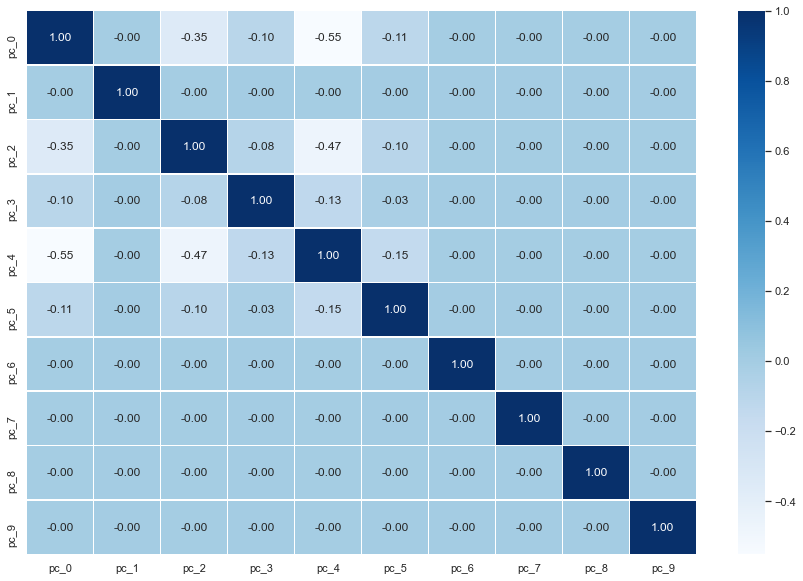

In [105]:
plt.figure(figsize=(15,10))
sns.heatmap(data=tn_p_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

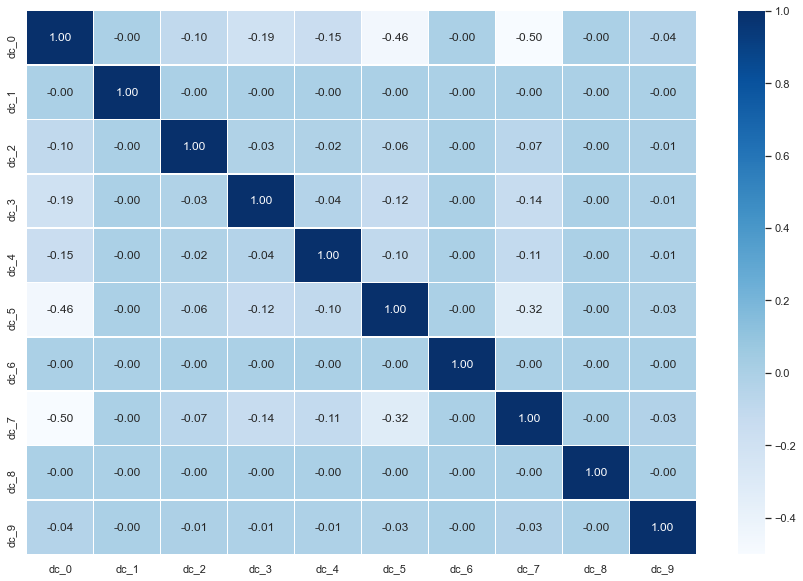

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(data=tn_d_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

지점 별 상관관계

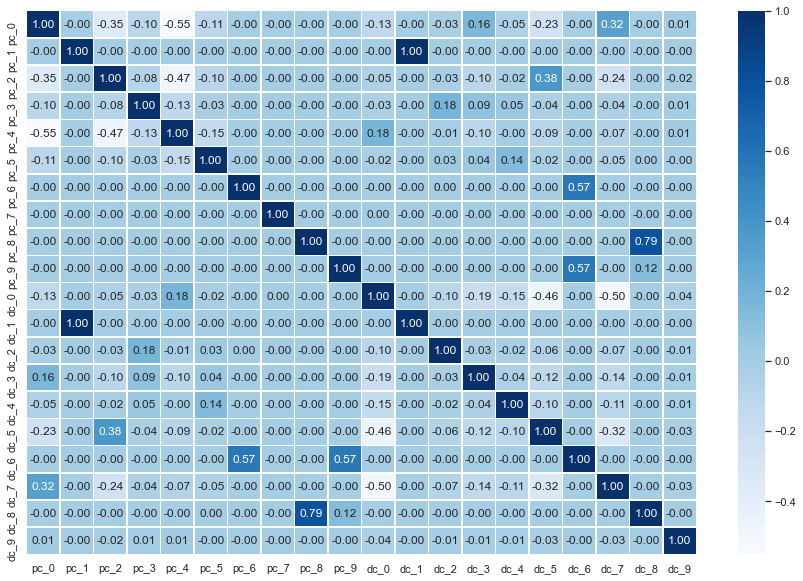

In [107]:
plt.figure(figsize=(15,10))
sns.heatmap(data=train_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

2. test 지점별 상관관계

In [109]:
test_loc=df_test.iloc[:, 12:32]

In [111]:
te_p_loc=df_test.iloc[:, 12:22]

In [113]:
te_d_loc=df_test.iloc[:, 22:32]

출발 지점

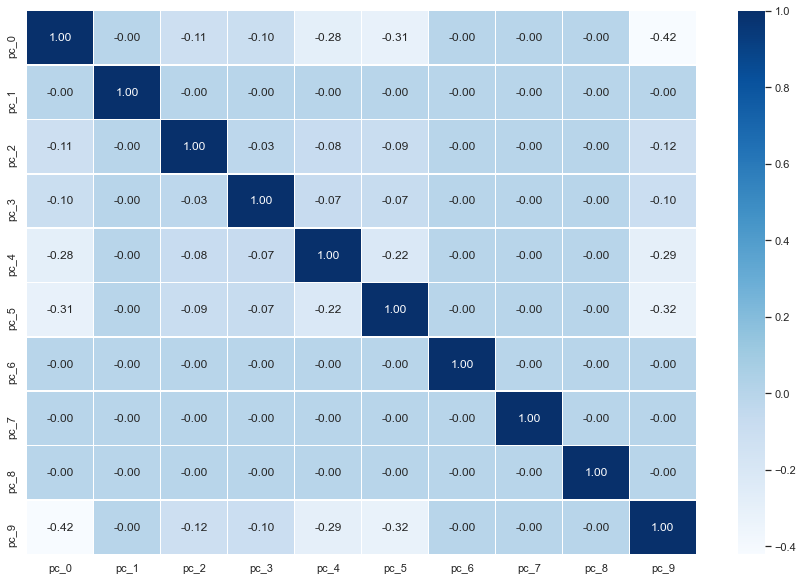

In [114]:
plt.figure(figsize=(15,10))
sns.heatmap(data=te_p_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

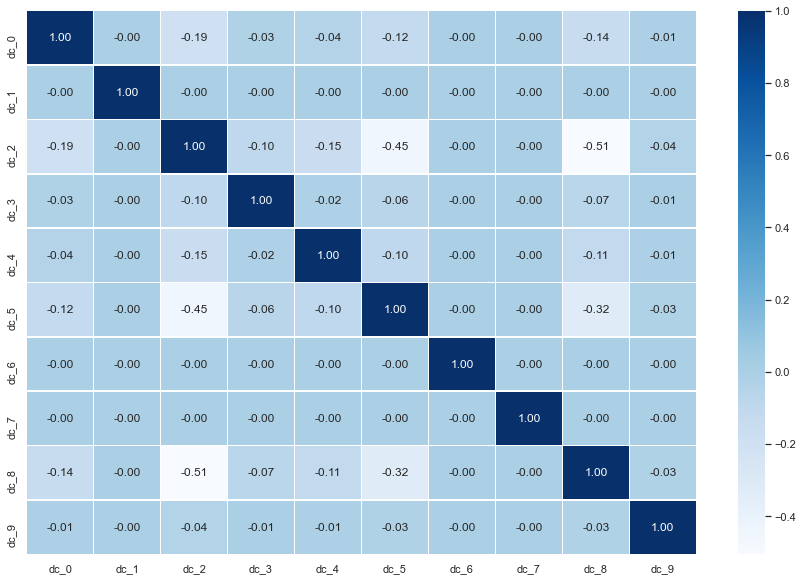

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(data=te_d_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

지점 별 상관관계

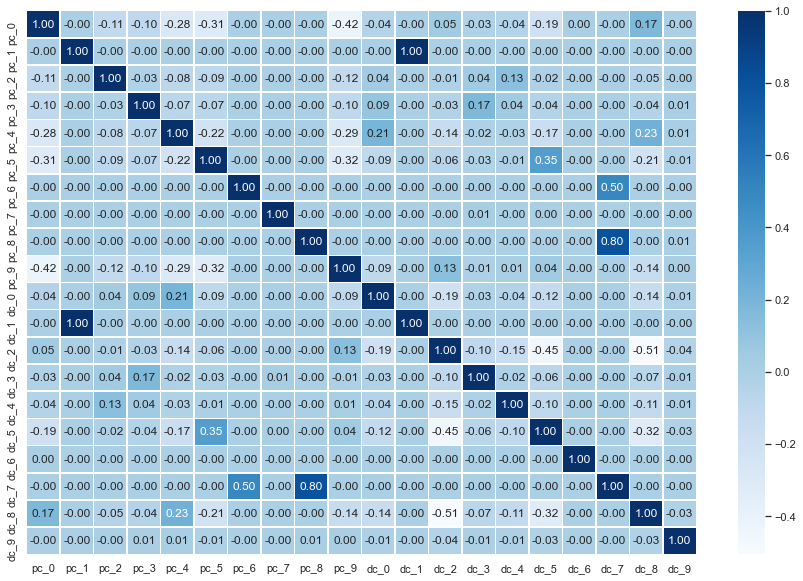

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(data=test_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

Machine learning
--

First Solution Process: Linear Regression
--

1. train data를 Linear Regression에 맞게 전처리 해준다.
2. train data를 train, test로 나눠서 적용해본다.
3. 실제 train데이터를 train, test데이터를 test로 나눈다.
4. test데이터의 예측값을 sample_submissiondml trip_duration에 적용해준다.

In [118]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'time_pickup', 'time_dropoff', 'month_pickup',
       'month_dropoff', 'date_pickup', 'date_dropoff', 'hour_pickup',
       'hour_dropoff', 'day_pickup', 'day_dropoff', 'elapsed_time',
       'elapsed_time_h', 'distance', 'pickup_clusters', 'dropoff_clusters',
       'pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8',
       'pc_9', 'dc_0', 'dc_1', 'dc_2', 'dc_3', 'dc_4', 'dc_5', 'dc_6', 'dc_7',
       'dc_8', 'dc_9'],
      dtype='object')

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  object         
 1   vendor_id           1458644 non-null  int64          
 2   pickup_datetime     1458644 non-null  datetime64[ns] 
 3   dropoff_datetime    1458644 non-null  datetime64[ns] 
 4   passenger_count     1458644 non-null  int64          
 5   pickup_longitude    1458644 non-null  float64        
 6   pickup_latitude     1458644 non-null  float64        
 7   dropoff_longitude   1458644 non-null  float64        
 8   dropoff_latitude    1458644 non-null  float64        
 9   store_and_fwd_flag  1458644 non-null  int64          
 10  trip_duration       1458644 non-null  int64          
 11  time_pickup         1458644 non-null  int32          
 12  time_dropoff        1458644 non-null  int32          
 1

In [141]:
lr_train=df_train.drop(['pickup_datetime','dropoff_datetime','elapsed_time','day_pickup','day_dropoff'], axis=1)
lr_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,...,1,0,0,0,0,0,0,0,0,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,...,0,0,0,0,0,0,0,1,0,0
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,...,0,0,0,0,0,0,0,1,0,0
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,...,0,0,0,0,0,0,0,1,0,0
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,...,0,0,0,0,0,1,0,0,0,0
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,...,1,0,0,0,0,0,0,0,0,0


In [142]:
lr_test=df_test.drop(['pickup_datetime','day_pickup'], axis=1)
lr_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_clusters,...,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,time_pickup,month_pickup,date_pickup,hour_pickup
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,1,2.74643,0,...,0,0,0,0,0,0,630235958,6,30,23
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,1,2.75924,4,...,0,0,0,0,0,0,630235953,6,30,23
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,1,1.30616,0,...,0,0,0,0,1,0,630235947,6,30,23
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,1,5.26909,5,...,0,0,0,0,1,0,630235941,6,30,23
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,1,0.96084,9,...,0,0,0,0,0,0,630235933,6,30,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,1,-74.003464,40.725105,-74.001251,40.733643,1,0.96744,4,...,0,0,0,0,1,0,101000252,1,1,0
625130,id3700764,1,1,-74.006363,40.743782,-73.953407,40.782467,1,6.19634,0,...,0,1,0,0,0,0,101000152,1,1,0
625131,id2568735,1,2,-73.972267,40.759865,-73.876602,40.748665,1,8.15372,9,...,1,0,0,0,0,0,101000124,1,1,0
625132,id1384355,1,1,-73.976501,40.733562,-73.854263,40.891788,1,20.38075,0,...,1,0,0,0,0,0,101000028,1,1,0


id label encoding

In [143]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_train_encoded_id=le.fit_transform(lr_train['id'])
np_id=lr_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_train['id']=id_1

In [144]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_test_encoded_id=le.fit_transform(lr_test['id'])
np_id=lr_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_test['id']=id_1

IQR을 이용하여 이상치 제거

In [145]:
# 이상치 제거
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [146]:
lr_train=remove_outlier_test(lr_train, 'elapsed_time_h' )
lr_train=remove_outlier_test(lr_train, 'distance' )
lr_train

74324
(1384320, 41)
107658
(1276662, 41)


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,...,1,0,0,0,0,0,0,0,0,0
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,...,0,0,0,0,0,0,0,1,0,0
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,...,0,0,0,0,0,0,0,1,0,0
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,...,0,0,0,0,0,1,0,0,0,0
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,...,1,0,0,0,0,0,0,0,0,0
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,...,0,0,0,0,0,0,0,1,0,0
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,...,0,0,0,0,0,1,0,0,0,0
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,...,1,0,0,0,0,0,0,0,0,0


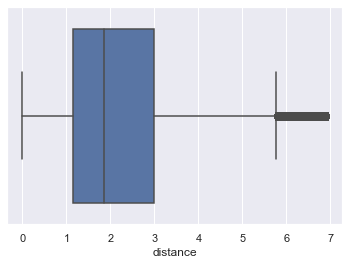

In [147]:
sns.boxplot(x = "distance", orient = "v", data = lr_train)
sns.set_style("darkgrid")
plt.show()

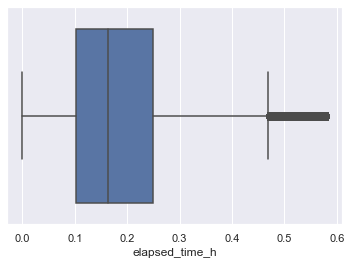

In [148]:
sns.boxplot(x = "elapsed_time_h", orient = "v", data = lr_train)
sns.set_style("darkgrid")
plt.show()

평균 속도 칼럼 만들어 주기

In [149]:
np_elap=np.array([lr_train.elapsed_time_h])
np_dis=np.array([lr_train.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
lr_train['km_h']=np_speed
lr_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,...,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,...,0,0,0,0,0,0,0,0,0,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,...,0,0,0,0,0,0,1,0,0,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,...,0,0,0,0,0,0,1,0,0,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,...,0,0,0,0,1,0,0,0,0,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,...,0,0,0,0,0,0,0,0,0,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,...,0,0,0,0,0,0,0,0,0,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,...,0,0,0,0,0,0,1,0,0,5.668780
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,...,0,0,0,0,1,0,0,0,0,33.251841
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,...,0,0,0,0,0,0,0,0,0,10.544928


In [150]:
lr_train=remove_outlier_test(lr_train, 'km_h' )
lr_train

39908
(1236754, 42)


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,...,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,...,0,0,0,0,0,0,0,0,0,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,...,0,0,0,0,0,0,1,0,0,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,...,0,0,0,0,0,0,1,0,0,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,...,0,0,0,0,1,0,0,0,0,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,...,0,0,0,0,0,0,0,0,0,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,...,0,0,0,0,1,0,0,0,0,16.756951
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,...,0,0,0,0,0,0,0,0,0,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,...,0,0,0,0,0,0,1,0,0,5.668780
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,...,0,0,0,0,0,0,0,0,0,10.544928


거리, 속력, 시간 시각화

<AxesSubplot:title={'center':'distance'}, xlabel='distance', ylabel='Density'>

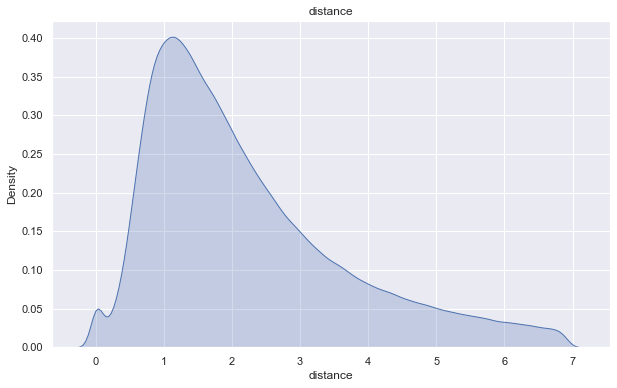

In [151]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("distance")
sns.kdeplot(data=lr_train['distance'], shade=True)

<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

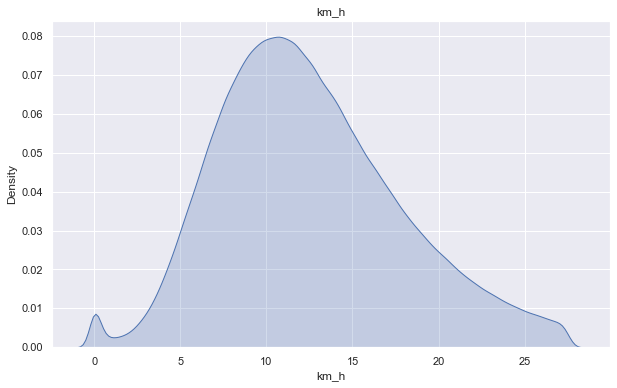

In [152]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=lr_train['km_h'], shade=True)

<AxesSubplot:title={'center':'elapsed_time_h'}, xlabel='elapsed_time_h', ylabel='Density'>

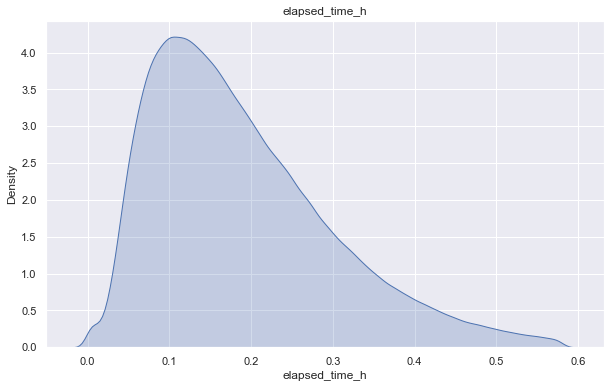

In [153]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("elapsed_time_h")
sns.kdeplot(data=lr_train['elapsed_time_h'], shade=True)

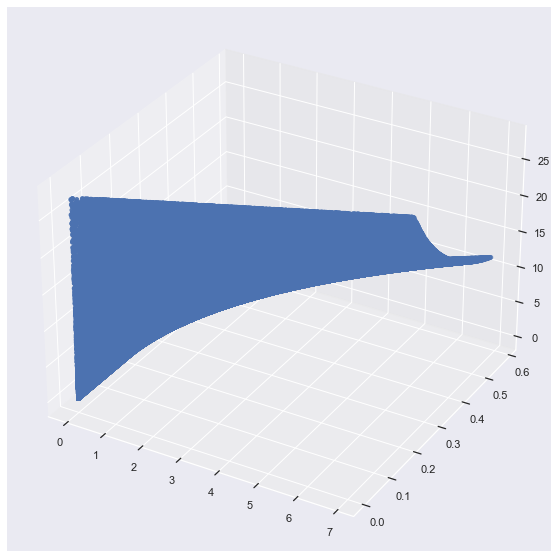

In [154]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

time=np.array(lr_train.elapsed_time_h)
distance=np.array(lr_train.distance)
speed=np.array(lr_train.km_h)

xs=distance
ys=time
zs=speed

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)


- x: distance(km)
- y: time(elapsed_time_h)
- z: speed(km/h)

모든 변수를 포함한 Linear Regression Model 만들기
--

train 데이터를 train, test로 나누어서 학습시켜보기

In [158]:
lr_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236754 entries, 0 to 1458643
Data columns (total 42 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1236754 non-null  int64  
 1   vendor_id           1236754 non-null  int64  
 2   passenger_count     1236754 non-null  int64  
 3   pickup_longitude    1236754 non-null  float64
 4   pickup_latitude     1236754 non-null  float64
 5   dropoff_longitude   1236754 non-null  float64
 6   dropoff_latitude    1236754 non-null  float64
 7   store_and_fwd_flag  1236754 non-null  int64  
 8   trip_duration       1236754 non-null  int64  
 9   time_pickup         1236754 non-null  int32  
 10  time_dropoff        1236754 non-null  int32  
 11  month_pickup        1236754 non-null  int32  
 12  month_dropoff       1236754 non-null  int32  
 13  date_pickup         1236754 non-null  int32  
 14  date_dropoff        1236754 non-null  int32  
 15  hour_pickup    

In [159]:
X=lr_train.drop(['trip_duration','time_dropoff','month_dropoff','date_dropoff','hour_dropoff','elapsed_time_h'], axis=1)

In [162]:
y=lr_train.trip_duration

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989403, 36)
(247351, 36)
(989403,)
(247351,)


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

- lr_train의 train 점수보기

In [165]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 159.2153306392239 입니다.
r2 는 0.84 입니다.
train 스코어는 0.8400837431574422 입니다.


- lr_train의 test 점수보기

In [168]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 159.52324109778652 입니다.
r2 점수는 0.84 입니다.
test 스코어는 0.8393884206177977 입니다.


In [169]:
y_test

858940     869
328458     500
892008     809
966825    2054
946665    1011
          ... 
455783     559
842642     418
298495    1468
389773    1227
78346      444
Name: trip_duration, Length: 247351, dtype: int64

In [170]:
y_test_pred.reshape(-1,1)

array([[ 846.18674469],
       [ 559.90134056],
       [ 866.60276763],
       ...,
       [1428.74310193],
       [1084.91209578],
       [ 459.69579093]])

In [171]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 2.318e+05
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        12:48:36   Log-Likelihood:            -8.0260e+06
No. Observations:             1236754   AIC:                         1.605e+07
Df Residuals:                 1236725   BIC:                         1.605e+07
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5558.6871    779.088     -7.135      0.000   -7085.674   -4031.701
id                  2.396e-07    3.4e-07      0.704      0.481   -4.27e-07    9.06e-07
vendor_id              1.9959      0.301      6.636      0.000       1.406       2.585
passenger_count        0.3906      0.114      3.424      0.001       0.167       0.614
pickup_longitude     106.3731     13.203      8.057      0.000      80.495     132.251
pickup_latitude      121.0480     12.858      9.414      0.000      95.846     146.250
dropoff_longitude   -224.5404     12.737    -17.629      0.000    -249.505    -199.576
dropoff_latitude    -124.0427     12.569     -9.869      0.000    -148.678     -99.408
store_and_fwd_flag    -5.0429      2.080     -2.424      0.015      -9.120      -0.966
time_pickup        -2.192e-05   8.27e-05     -0.265      0.791      -0.000       0.000
month_pickup        2196.7476   8271.545      0.266      0.791    -1.4e+04    1.84e+04
date_pickup           22.0104     82.715      0.266      0.790    -140.109     184.130
hour_pickup           -0.0108      0.827     -0.013      0.990      -1.632       1.611
distance             268.0497      0.111   2410.424      0.000     267.832     268.268
pickup_clusters     -242.5113     36.695     -6.609      0.000    -314.432    -170.591
dropoff_clusters    -195.6644     27.930     -7.005      0.000    -250.407    -140.922
pc_0               -1233.5614    200.745     -6.145      0.000   -1627.014    -840.109
pc_1               -3754.2431    457.603     -8.204      0.000   -4651.129   -2857.357
pc_2                -735.0823    128.849     -5.705      0.000    -987.622    -482.542
pc_3                -587.0045     92.666     -6.335      0.000    -768.627    -405.382
pc_4                -252.5356     60.631     -4.165      0.000    -371.371    -133.700
pc_5                 -43.3810     35.146     -1.234      0.217    -112.266      25.504
pc_6                 401.9944     87.095      4.616      0.000     231.292     572.697
pc_7                1.273e-11   8.22e-11      0.155      0.877   -1.48e-10    1.74e-10
pc_8                 203.1084     56.152      3.617      0.000      93.053     313.164
pc_9                 437.0138    119.513      3.657      0.000     202.773     671.255
dc_0               -1156.7143    191.133     -6.052      0.000   -1531.329    -782.100
dc_1               -3754.2431    457.603     -8.204      0.000   -4651.129   -2857.357
dc_2                -828.2299    134.063     -6.178      0.000   -1090.988    -565.472
dc_3                -617.7395    107.014     -5.773      0.000    -827.483    -407.996
dc_4                -444.5868     79.230     -5.611      0.000    -599.874    -289.299
dc_5                -200.1484     52.006     -3.849      0.000    -302.078     -98.219
dc_6                 839.0082    114.1

In [173]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 25447.664 , RMSE : 159.523
Variance score : 0.839


In [174]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

month_pickup          3309.6
pc_0                  1018.5
pc_6                   944.1
dc_0                   941.1
pc_2                   706.6
dc_2                   661.6
dc_3                   573.0
dc_6                   568.1
pc_3                   456.8
dc_4                   445.2
dc_5                   387.5
pc_4                   376.6
distance               267.9
pc_5                   183.2
dc_7                   169.5
pickup_clusters        163.3
pickup_latitude        108.7
dropoff_clusters       106.5
pickup_longitude        86.3
date_pickup             33.1
vendor_id                1.7
passenger_count          0.4
hour_pickup              0.1
time_pickup             -0.0
id                       0.0
pc_7                    -0.0
store_and_fwd_flag      -7.1
km_h                   -47.7
dropoff_latitude      -133.7
dropoff_longitude     -230.1
pc_9                  -376.0
dc_9                  -436.2
pc_8                  -573.3
dc_8                  -573.3
pc_1          

Text(0.5, 1.0, 'Feature Coeff')

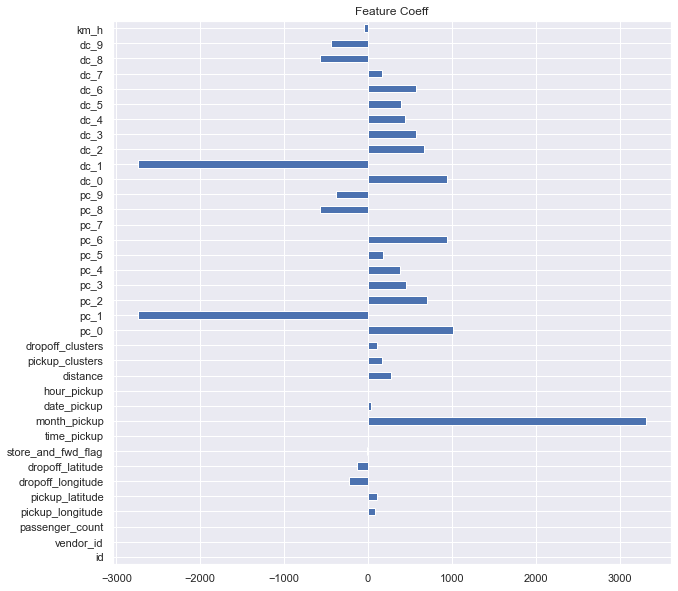

In [175]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge test score: {:.3f}'.format(ridge.score(X_test, y_test)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso test score: {:.3f}'.format(lasso.score(X_test, y_test)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet test score: {:.3f}'.format(elasticnet.score(X_test, y_test)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.840
lr test score: 0.839
lr mse: 25447.664
lr rmse: 159.523


ridge train score: 0.840
ridge test score: 0.839
ridge mse: 25444.012
ridge rmse: 159.512


lasso train score: 0.839
lasso test score: 0.838
lasso mse: 25635.169
lasso rmse: 160.110


elasticnet train score: 0.798
elasticnet test score: 0.797
elasticnet mse: 32239.986
elasticnet rmse: 179.555


실제 train데이터와 test 데이터에 적용해보기
--

In [187]:
X_train=lr_train.drop(['trip_duration','time_dropoff','month_dropoff','date_dropoff','hour_dropoff','elapsed_time_h','km_h'], axis=1)

In [188]:
X_test=lr_test

In [189]:
X_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,3,...,1,0,0,0,0,0,0,0,0,0
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,6,...,0,0,0,0,0,0,0,1,0,0
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,4,...,0,0,0,0,0,0,0,1,0,0
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,3,...,0,0,0,0,0,1,0,0,0,0
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,130220140,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,417184816,4,...,0,0,0,0,0,1,0,0,0,0
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,202003939,2,...,1,0,0,0,0,0,0,0,0,0
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,4,...,0,0,0,0,0,0,0,1,0,0
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1,...,1,0,0,0,0,0,0,0,0,0


In [190]:
X_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_clusters,...,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,time_pickup,month_pickup,date_pickup,hour_pickup
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,1,2.74643,0,...,0,0,0,0,0,0,630235958,6,30,23
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,1,2.75924,4,...,0,0,0,0,0,0,630235953,6,30,23
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,1,1.30616,0,...,0,0,0,0,1,0,630235947,6,30,23
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,1,5.26909,5,...,0,0,0,0,1,0,630235941,6,30,23
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,1,0.96084,9,...,0,0,0,0,0,0,630235933,6,30,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,1,0.96744,4,...,0,0,0,0,1,0,101000252,1,1,0
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,1,6.19634,0,...,0,1,0,0,0,0,101000152,1,1,0
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,1,8.15372,9,...,1,0,0,0,0,0,101000124,1,1,0
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,1,20.38075,0,...,1,0,0,0,0,0,101000028,1,1,0


In [193]:
y_train=lr_train.trip_duration
y_train

0          455
1          663
3          429
4          435
5          443
          ... 
1458637    760
1458638    414
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 1236754, dtype: int64

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [195]:
y_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 274.82509958525003 입니다.
r2 는 0.52 입니다.
train 스코어는 0.5234852222788998 입니다.


In [197]:
pred=reg_all.predict(X_test)

In [198]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [199]:
submission

,id,trip_duration
0,id3004672,-7.483177e+11
1,id3505355,-7.483174e+11
2,id1217141,-7.483176e+11
3,id2150126,-7.483173e+11
4,id1598245,-7.483170e+11
...,...,...
625129,id3008929,-1.199235e+11
625130,id3700764,-1.199236e+11
625131,id2568735,-1.199230e+11
625132,id1384355,-1.199235e+11


In [200]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X_train)

model_1=sm.OLS(y_train,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                 5.032e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        12:58:31   Log-Likelihood:            -8.7007e+06
No. Observations:             1236754   AIC:                         1.740e+07
Df Residuals:                 1236726   BIC:                         1.740e+07
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.011e+04   1344.000     14.966      0.000    1.75e+04    2.27e+04
id                  1.135e-06   5.87e-07      1.933      0.053   -1.59e-08    2.29e-06
vendor_id              1.0022      0.519      1.931      0.053      -0.015       2.019
passenger_count        1.8439      0.197      9.369      0.000       1.458       2.230
pickup_longitude      57.5562     22.782      2.526      0.012      12.905     102.207
pickup_latitude      804.1528     22.174     36.266      0.000     760.693     847.613
dropoff_longitude    114.4017     21.974      5.206      0.000      71.333     157.470
dropoff_latitude   -1270.8982     21.651    -58.700      0.000   -1313.333   -1228.464
store_and_fwd_flag    19.0063      3.589      5.296      0.000      11.972      26.041
time_pickup           -0.0007      0.000     -4.754      0.000      -0.001      -0.000
month_pickup        6.786e+04   1.43e+04      4.755      0.000    3.99e+04    9.58e+04
date_pickup          678.6817    142.722      4.755      0.000     398.952     958.411
hour_pickup            9.4870      1.428      6.646      0.000       6.689      12.285
distance             199.1838      0.176   1130.487      0.000     198.838     199.529
pickup_clusters     1005.6114     63.301     15.886      0.000     881.543    1129.680
dropoff_clusters     840.2766     48.179     17.441      0.000     745.847     934.707
pc_0                5925.8652    346.291     17.112      0.000    5247.146    6604.584
pc_1                8594.6179    789.465     10.887      0.000    7047.293    1.01e+04
pc_2                3898.5543    222.268     17.540      0.000    3462.916    4334.192
pc_3                2876.8128    159.848     17.997      0.000    2563.517    3190.109
pc_4                1915.9738    104.591     18.319      0.000    1710.979    2120.968
pc_5                 834.1020     60.636     13.756      0.000     715.258     952.946
pc_6                 222.7119    150.280      1.482      0.138     -71.831     517.255
pc_7               -1.138e-09   2.12e-10     -5.369      0.000   -1.55e-09   -7.22e-10
pc_8               -1602.6051     96.869    -16.544      0.000   -1792.464   -1412.746
pc_9               -2707.3766    206.187    -13.131      0.000   -3111.497   -2303.256
dc_0                5911.7203    329.704     17.930      0.000    5265.511    6557.930
dc_1                8594.6179    789.465     10.887      0.000    7047.293    1.01e+04
dc_2                4022.2456    231.260     17.393      0.000    3568.983    4475.508
dc_3                3241.1950    184.602     17.558      0.000    2879.382    3603.008
dc_4                2394.9087    136.673     17.523      0.000    2127.034    2662.784
dc_5                1599.1553     89.713     17.825      0.000    1423.320    1774.990
dc_6               -2484.6647    196.8

In [202]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

month_pickup          67809.1
dc_1                   2734.2
pc_1                   2734.2
pickup_latitude         804.2
dc_8                    690.9
pc_8                    690.9
date_pickup             678.2
dc_9                    441.1
pc_5                    256.2
distance                199.2
dropoff_longitude       114.4
dc_7                     98.3
pickup_longitude         57.6
store_and_fwd_flag       19.0
hour_pickup               9.5
passenger_count           1.8
vendor_id                 1.0
time_pickup              -0.0
id                        0.0
pc_7                     -0.0
pc_4                     -7.3
pc_9                    -40.6
dropoff_clusters       -144.0
dc_5                   -224.8
pickup_clusters        -339.8
pc_3                   -391.9
dc_4                   -413.3
dc_3                   -551.3
pc_2                   -715.6
dc_2                   -754.4
dc_0                   -833.4
pc_6                  -1146.7
dc_6                  -1187.4
dropoff_la

Text(0.5, 1.0, 'Feature Coeff')

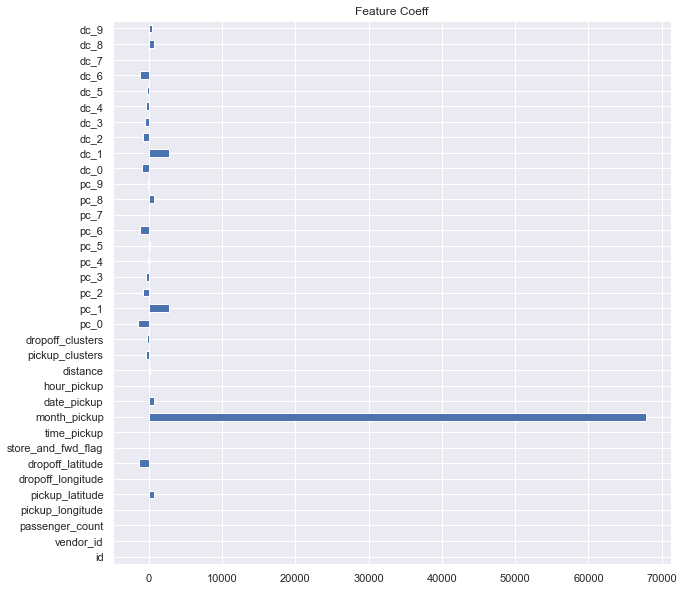

In [203]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.523
lr mse: 75528.835
lr rmse: 274.825


ridge train score: 0.523
ridge mse: 75532.432
ridge rmse: 274.832


lasso train score: 0.521
lasso mse: 75865.723
lasso rmse: 275.437


elasticnet train score: 0.497
elasticnet mse: 79801.834
elasticnet rmse: 282.492


Second Solution Process: Classification
--

In [206]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,1,0,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,0,0,0,0,0,0,1,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,0,0,0,0,0,0,0,1,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,0,0,0,0,0,0,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,0,0,0,0,0,1,0,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,1,0,0,0,0,0,0,0,0,0


In [207]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,...,dc_5,dc_6,dc_7,dc_8,dc_9,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,2.74643,...,0,0,0,0,0,630235958,6,30,23,Thursday
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,2.75924,...,0,0,0,0,0,630235953,6,30,23,Thursday
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,1.30616,...,0,0,0,1,0,630235947,6,30,23,Thursday
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,5.26909,...,0,0,0,1,0,630235941,6,30,23,Thursday
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,0.96084,...,0,0,0,0,0,630235933,6,30,23,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,0.96744,...,0,0,0,1,0,101000252,1,1,0,Friday
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,6.19634,...,1,0,0,0,0,101000152,1,1,0,Friday
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,8.15372,...,0,0,0,0,0,101000124,1,1,0,Friday
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,20.38075,...,0,0,0,0,0,101000028,1,1,0,Friday
